<a href="https://colab.research.google.com/github/enwachukwu/abc/blob/main/Audiobook_Customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Audiobook_Customer_Pr_Porject/Audiobooks_data .csv')

In [ ]:
raw_csv_data

,00994,1620,1620.1,19.73,19.73.1,1,10.00,0.99,1603.80,5,92,0
0,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
1,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
3,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
4,3416,2160.0,2160,4.61,4.61,0,8.91,0.00,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14078,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14079,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14080,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14081,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0


from matplotlib import pyplot as plt
raw_csv_data['00994'].plot(kind='hist', bins=20, title='00994')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['1620'].plot(kind='hist', bins=20, title='1620')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['1620.1'].plot(kind='hist', bins=20, title='1620.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['19.73'].plot(kind='hist', bins=20, title='19.73')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data.plot(kind='scatter', x='00994', y='1620', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data.plot(kind='scatter', x='1620', y='1620.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data.plot(kind='scatter', x='1620.1', y='19.73', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data.plot(kind='scatter', x='19.73', y='19.73.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['00994'].plot(kind='line', figsize=(8, 4), title='00994')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['1620'].plot(kind='line', figsize=(8, 4), title='1620')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['1620.1'].plot(kind='line', figsize=(8, 4), title='1620.1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
raw_csv_data['19.73'].plot(kind='line', figsize=(8, 4), title='19.73')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
raw_csv_data.shape

(14083, 12)

In [ ]:
# Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(raw_csv_data.head())

# Print the summary overview
print("\nSummary overview:")
print(raw_csv_data.info())


First 5 rows of the dataset:
   00994    1620  1620.1  19.73  19.73.1  1  10.00  0.99  1603.80  5   92  0
0   1143  2160.0    2160   5.33     5.33  0   8.91  0.00      0.0  0    0  0
1   2059  2160.0    2160   5.33     5.33  0   8.91  0.00      0.0  0  388  0
2   2882  1620.0    1620   5.96     5.96  0   8.91  0.42    680.4  1  129  0
3   3342  2160.0    2160   5.33     5.33  0   8.91  0.22    475.2  0  361  0
4   3416  2160.0    2160   4.61     4.61  0   8.91  0.00      0.0  0    0  0

Summary overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14083 entries, 0 to 14082
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   00994    14083 non-null  int64  
 1   1620     14083 non-null  float64
 2   1620.1   14083 non-null  int64  
 3   19.73    14083 non-null  float64
 4   19.73.1  14083 non-null  float64
 5   1        14083 non-null  int64  
 6   10.00    14083 non-null  float64
 7   0.99     14083 non-null  float64
 

In [ ]:
# Calculate mean
mean_values = raw_csv_data.mean()

# Calculate median
median_values = raw_csv_data.median()

# Calculate mode
mode_values = raw_csv_data.mode().iloc[0]

# Calculate standard deviation
std_values = raw_csv_data.std()

# Print the results
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)
print("\nStandard deviation values:")
print(std_values)

Mean values:
00994      16773.611943
1620        1591.279646
1620.1      1678.612796
19.73          7.102894
19.73.1        7.542940
1              0.160690
10.00          8.909717
0.99           0.125598
1603.80      189.788585
5              0.069871
92            61.932898
0              0.158844
dtype: float64

Median values:
00994      16715.00
1620        1620.00
1620.1      1620.00
19.73          5.95
19.73.1        6.07
1              0.00
10.00          8.91
0.99           0.00
1603.80        0.00
5              0.00
92            11.00
0              0.00
dtype: float64

Mode values:
00994         2.00
1620       2160.00
1620.1     2160.00
19.73         5.33
19.73.1       5.33
1             0.00
10.00         8.91
0.99          0.00
1603.80       0.00
5             0.00
92            0.00
0             0.00
Name: 0, dtype: float64

Standard deviation values:
00994      9691.239210
1620        504.358512
1620.1      654.861664
19.73         4.930700
19.73.1       5.559378
1   

In [ ]:
# Check for missing values
missing_values = raw_csv_data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
00994      0
1620       0
1620.1     0
19.73      0
19.73.1    0
1          0
10.00      0
0.99       0
1603.80    0
5          0
92         0
0          0
dtype: int64



## Loading the dataset with np load text

In [ ]:
raw_csv_data = np.loadtxt('/content/drive/MyDrive/Audiobook_Customer_Pr_Porject/Audiobooks_data .csv', delimiter = ',')
unscaled_inputs_all = raw_csv_data[:,1:-1] # load the data excluding the id and tergat column
targets_all = raw_csv_data[:,-1] # this loads the target column

In [ ]:
unscaled_inputs_all

array([[1620.  , 1620.  ,   19.73, ..., 1603.8 ,    5.  ,   92.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    0.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,  388.  ],
       ...,
       [2160.  , 2160.  ,    6.14, ...,    0.  ,    0.  ,    0.  ],
       [1620.  , 1620.  ,    5.33, ...,  615.6 ,    0.  ,   90.  ],
       [1674.  , 3348.  ,    5.33, ...,    0.  ,    0.  ,    0.  ]])

In [ ]:
targets_all

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
#Balance the data
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)

In [ ]:
#standardize the inputs
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [ ]:

# Shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

In [ ]:
# Split the dataset into train, validation and test
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count -validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets)/train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets)/validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets)/test_samples_count)

1806.0 3579 0.5046102263202011
216.0 447 0.48322147651006714
215.0 448 0.4799107142857143


In [ ]:
# Save the three datasets in .npz files
#np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
#np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
#np.savez('Audiobooks_data_test', inputs=test_inputs,targets=test_targets)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class Audiobooks_Data_Reader():
    def __init__(self, dataset, batch_size=None):
        npz = np.load('/content/drive/MyDrive/Audiobook_Customer_Pr_Porject/Audiobooks_data_{0}.npz'.format(dataset))
        self.inputs, self.targets = npz['inputs'].astype(np.float32), npz['targets'].astype(np.int32)

        # One-hot encode the targets
        classes_num = 2
        self.targets_one_hot = np.zeros((self.targets.shape[0], classes_num))
        self.targets_one_hot[range(self.targets.shape[0]), self.targets.flatten()] = 1

        if batch_size is None:
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size

        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size

    def __next__(self):
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()

        batch_slice = slice(self.curr_batch * self.batch_size, (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets_one_hot[batch_slice]
        self.curr_batch += 1

        return inputs_batch, targets_batch

    def __iter__(self):
        return self

In [ ]:
# Define constants
input_size = 10
output_size = 2
hidden_layer_size = 50
batch_size = 100
max_epochs = 50

# Reset graph and set random seed for reproducibility
tf.random.set_seed(42)

# Create model using tf.keras.Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(input_size,), name='dense_1'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', name='dense_2'),
    tf.keras.layers.Dense(output_size, activation='softmax', name='output')
])


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create data reader instances after defining batch_size
train_data = Audiobooks_Data_Reader('train', batch_size)
validation_data = Audiobooks_Data_Reader('validation')


In [ ]:
# Train the model
history = model.fit(train_data.inputs, train_data.targets_one_hot,
                    epochs=max_epochs, batch_size=batch_size,
                    validation_data=(validation_data.inputs, validation_data.targets_one_hot))

Epoch 1/50
36/36 [==============================] - 2s 11ms/step - loss: 0.6226 - accuracy: 0.6468 - val_loss: 0.5177 - val_accuracy: 0.7562
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7569 - val_loss: 0.4265 - val_accuracy: 0.7830
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.7952 - val_loss: 0.3906 - val_accuracy: 0.8098
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.7980 - val_loss: 0.3729 - val_accuracy: 0.7964
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.7985 - val_loss: 0.3640 - val_accuracy: 0.8188
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8089 - val_loss: 0.3537 - val_accuracy: 0.8076
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8125 - val_loss: 0.3531 - val_accuracy: 0.7919
Epoch 8/50
36/36 [=

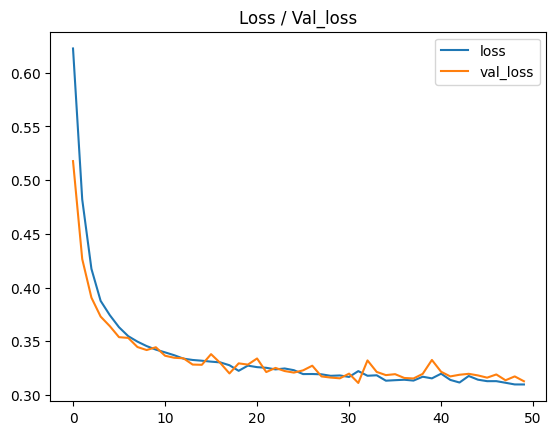

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss / Val_loss')
plt.legend();

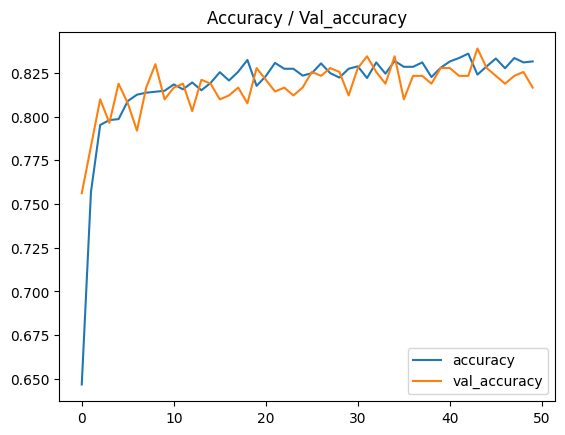

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy / Val_accuracy')
plt.legend();

In [ ]:
# Evaluate the model on test data
test_data = Audiobooks_Data_Reader('test')
test_loss, test_accuracy = model.evaluate(test_data.inputs, test_data.targets_one_hot)

print('Test loss: {:.4f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

14/14 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8125
Test loss: 0.3213
Test accuracy: 81.25%


In [ ]:
# Make predictions
predicted_probs = model.predict(test_data.inputs)
predicted_labels = np.argmax(predicted_probs, axis=1)
true_labels = np.argmax(test_data.targets_one_hot, axis=1)


14/14 [==============================] - 0s 2ms/step


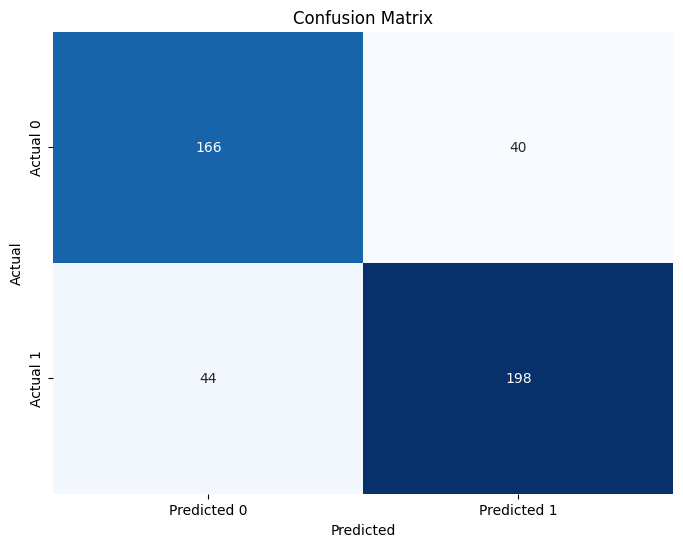

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Accuracy: 0.8125
Precision: 0.8319327731092437
Recall: 0.8181818181818182
F1-Score: 0.825
